In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\shara\Music\DATA SET\AI usage data set.csv")

In [47]:
# 1. Initial Overview

print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (3614, 16)

Data Types:
 Student_Name                  object
College_Name                  object
Stream                        object
Year_of_Study                  int64
AI_Tools_Used                 object
Daily_Usage_Hours            float64
Use_Cases                     object
Trust_in_AI_Tools              int64
Impact_on_Grades               int64
Do_Professors_Allow_Use       object
Preferred_AI_Tool             object
Awareness_Level                int64
Willing_to_Pay_for_Access     object
State                         object
Device_Used                   object
Internet_Access               object
dtype: object

First 5 Rows:
  Student_Name                                      College_Name       Stream  \
0        Aarav       Indian Institute of Information Technology   Engineering   
1       Vivaan   Government Ram Bhajan Rai NES College, Jashpur      Commerce   
2       Aditya     Dolphin PG Institute of BioMedical & Natural       Science   
3       Vihaan 

In [48]:
# 2. Data Cleaning

df = df.drop_duplicates()
df['Daily_Usage_Hours'] = pd.to_numeric(df['Daily_Usage_Hours'], errors='coerce')
df = df.dropna(subset=['Daily_Usage_Hours'])

# Fill missing values
if 'Preferred_AI_Tool' in df.columns:
    df['Preferred_AI_Tool'] = df['Preferred_AI_Tool'].fillna('Unknown')

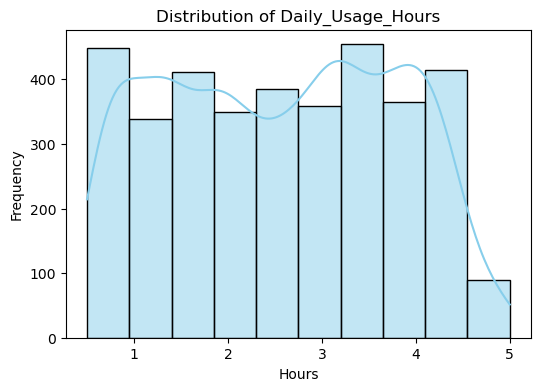

This histogram displays how many students fall into different ranges of daily AI tool usage hours


In [49]:
# 3. Univariate Analysis

plt.figure(figsize=(6, 4))
sns.histplot(df['Daily_Usage_Hours'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Daily_Usage_Hours")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()
print("This histogram displays how many students fall into different ranges of daily AI tool usage hours")

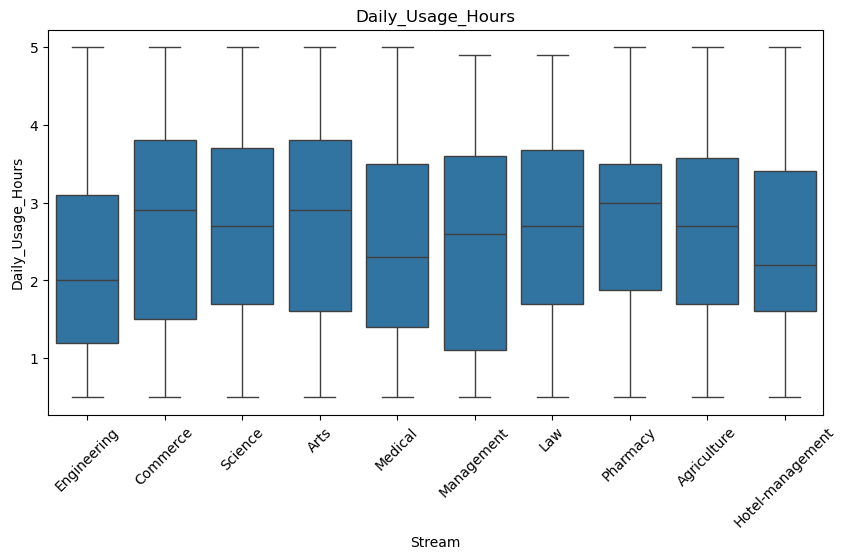

A boxplot comparing AI tool usage across different academic streams


In [50]:
# 4. Bivariate Analysis
if 'Stream' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Stream', y='Daily_Usage_Hours', data=df)
    plt.xticks(rotation=45)
    plt.title("Daily_Usage_Hours")
    plt.show()
    print("A boxplot comparing AI tool usage across different academic streams")

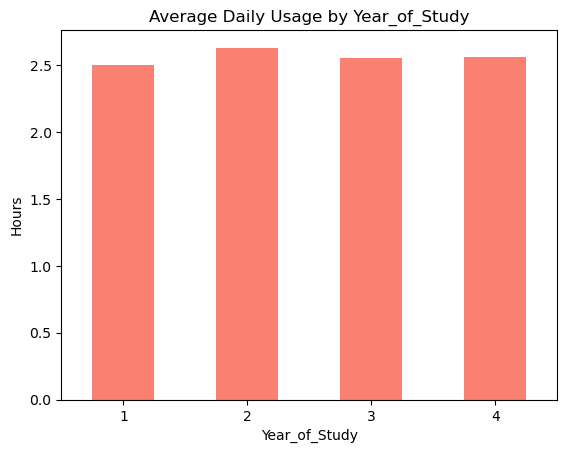

A bar chart showing the average daily AI tool usage for students in each academic year


In [51]:
if 'Year_of_Study' in df.columns:
    usage_by_year = df.groupby('Year_of_Study')['Daily_Usage_Hours'].mean()
    usage_by_year.plot(kind='bar', color='salmon')
    plt.title("Average Daily Usage by Year_of_Study")
    plt.ylabel("Hours")
    plt.xticks(rotation=0)
    plt.show()
    print("A bar chart showing the average daily AI tool usage for students in each academic year")

In [52]:
# 5. Multivariate Analysis

if 'Stream' in df.columns and 'Year_of_Study' in df.columns:
    pivot = df.pivot_table(values='Daily_Usage_Hours', index='Stream', columns='Year_of_Study', aggfunc='mean')
    print("\nPivot Table - Avg Usage:\n", pivot)
    
print("pivot table summarizing the average daily usage of AI tools by both stream and year of study.")


Pivot Table - Avg Usage:
 Year_of_Study            1         2         3         4
Stream                                                  
Agriculture       2.773611  2.519737  2.743396  2.593443
Arts              2.794444  3.008333  2.437000  2.520619
Commerce          2.816216  2.825000  2.642478  2.694624
Engineering       1.518261  2.547826  2.484416  2.297959
Hotel-management  2.203571  2.291089  2.369880  2.794872
Law               2.515789  2.966176  2.514634  2.571250
Management        2.198990  2.458730  2.696429  2.526761
Medical           2.843333  2.430303  2.242424  2.317978
Pharmacy          2.834848  2.740000  2.574286  2.853571
Science           2.707692  2.637410  2.738462  2.559859
pivot table summarizing the average daily usage of AI tools by both stream and year of study.


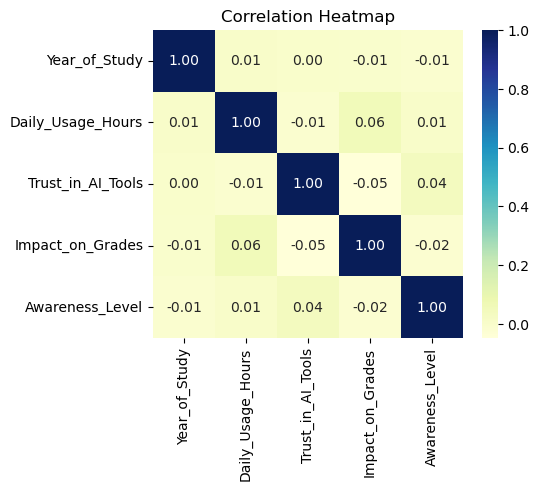

A heatmap of correlations between numeric variables in the dataset


In [53]:
# Correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("A heatmap of correlations between numeric variables in the dataset")

C:\Users\shara\AppData\Local\Temp\ipykernel_10528\1322202348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Preferred_AI_Tool',


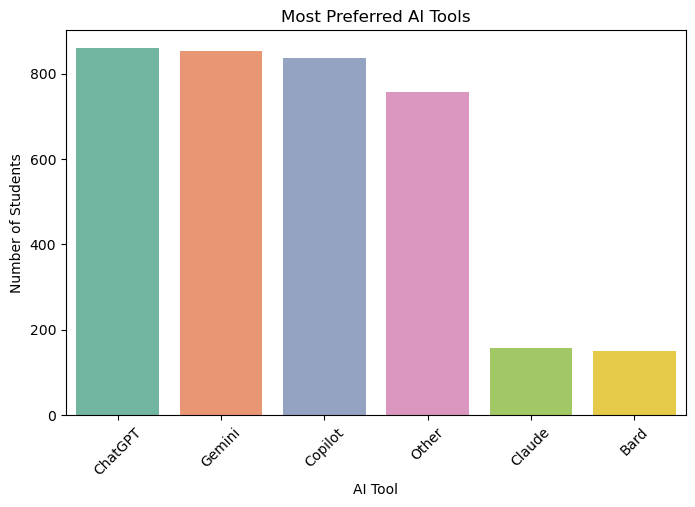

This bar chart displays which AI tools students prefer the most. It indicates adoption trends and tool popularity.


In [54]:
# Preferred AI Tool
if 'Preferred_AI_Tool' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Preferred_AI_Tool',
                  order=df['Preferred_AI_Tool'].value_counts().index,
                  palette='Set2')
    plt.xticks(rotation=45)
    plt.title("Most Preferred AI Tools")
    plt.xlabel("AI Tool")
    plt.ylabel("Number of Students")
    plt.show()
    print("This bar chart displays which AI tools students prefer the most. "
          "It indicates adoption trends and tool popularity.")

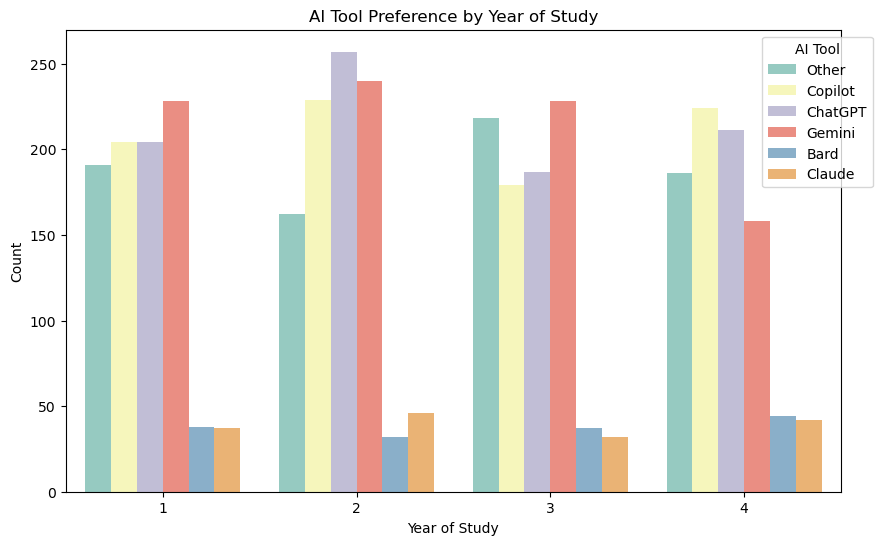

This grouped bar chart compares AI tool preferences across different years. It highlights whether certain tools are more common in early or later years.


In [55]:
# Year vs Tool - Grouped Bar
if 'Year_of_Study' in df.columns and 'Preferred_AI_Tool' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x='Year_of_Study', hue='Preferred_AI_Tool', palette='Set3')
    plt.title("AI Tool Preference by Year of Study")
    plt.xlabel("Year of Study")
    plt.ylabel("Count")
    plt.legend(title="AI Tool", bbox_to_anchor=(1.05, 1))
    plt.show()
    print("This grouped bar chart compares AI tool preferences across different years. "
          "It highlights whether certain tools are more common in early or later years.")

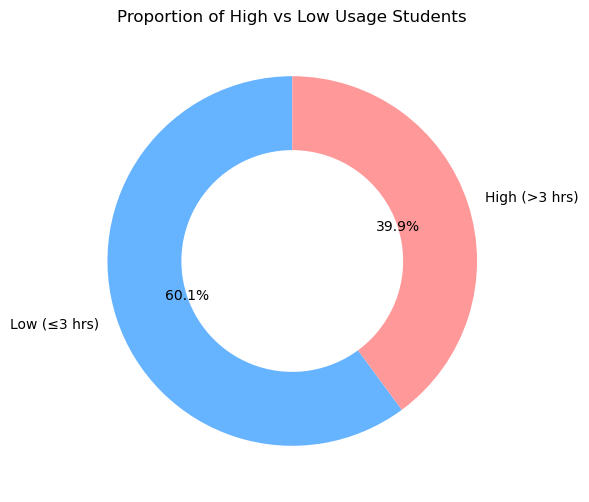

This donut chart illustrates the proportion of students who are high AI users (>3 hours daily) versus low users (≤3 hours).


In [56]:
# High vs Low Usage - Donut Chart
df['High Usage'] = df['Daily_Usage_Hours'] > 3
usage_counts = df['High Usage'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(usage_counts, labels=["Low (≤3 hrs)", "High (>3 hrs)"], autopct='%1.1f%%',
        startangle=90, colors=["#66b3ff","#ff9999"], wedgeprops=dict(width=0.4))
plt.title("Proportion of High vs Low Usage Students")
plt.show()
print("This donut chart illustrates the proportion of students who are high AI users "
      "(>3 hours daily) versus low users (≤3 hours).")

In [57]:
# 6. Derived Insights

df['High Usage'] = df['Daily_Usage_Hours'] > 3
print("\nHigh Usage Students (>3 hrs/day):", df['High Usage'].sum())

if 'Device Used' in df.columns:
    print("\nAverage Usage by Device:")
    print(df.groupby('Device Used')['Daily_Usage_Hours'].mean())

if 'Preferred_AI_Tool' in df.columns:
    print("\nTop 3 AI Tools:")
    print(df['Preferred_AI_Tool'].value_counts().head(3))




High Usage Students (>3 hrs/day): 1442

Top 3 AI Tools:
Preferred_AI_Tool
ChatGPT    859
Gemini     854
Copilot    836
Name: count, dtype: int64


In [58]:
# 7. Summary 

# - Most students use AI tools for 1–3 hours daily.
# - Tools like ChatGPT, Grammarly are among the most preferred.
# - Streams like CS/IT show higher average usage than others.
# - Year-wise usage indicates tech adoption increases in later years.
# - Device preference impacts usage — laptops show higher average hours.
# - Recommendation: AI tool workshops can be tailored by stream/year.

In [59]:
print (df)

     Student_Name                                      College_Name  \
0           Aarav       Indian Institute of Information Technology    
1          Vivaan   Government Ram Bhajan Rai NES College, Jashpur    
2          Aditya     Dolphin PG Institute of BioMedical & Natural    
3          Vihaan  Shaheed Rajguru College of Applied Sciences for    
4           Arjun                   Roorkee College of Engineering    
...           ...                                               ...   
3609       Ishaan               St. Mira's College for Girls, Pune    
3610        Rudra                      Roorkee College of Pharmacy    
3611        Dhruv                           Bahona College, Jorhat    
3612        Kabir      Sree Chitra Thirunal College of Engineering    
3613       Atharv                  Poona College of Pharmacy, Pune    

           Stream  Year_of_Study     AI_Tools_Used  Daily_Usage_Hours  \
0     Engineering              4            Gemini                0.9   
1